In [1]:
import sys, os
sys.path.append(os.path.abspath(".."))

import numpy as np
import matplotlib.pylab as plt
from src.dataset import Dataset
from src.soft_dtw import SoftDTW, squared_euclidean_distances
from src.softdtw_barycenter import softdtw_barycenter

In [2]:
def softdtw_kmeans(X_list, K, gamma=1.0, max_outer=30, max_inner=100, seed=0):
    rng = np.random.RandomState(seed)

    indices = rng.choice(len(X_list), size=K, replace=False)
    Z = [X_list[idx].copy() for idx in indices]
    
    assignments = np.zeros(len(X_list), dtype=int)

    for it in range(max_outer):
        print(f"[Iteration {it+1}/{max_outer}] Assignment step...")

        for i, X in enumerate(X_list):


            costs = []
            for j in range(K):
                D = squared_euclidean_distances(X, Z[j])
                sdtw = SoftDTW(D, gamma=gamma)
                costs.append(sdtw.forward())

            assignments[i] = np.argmin(costs)

        print(f"Recomputing barycenters...")

        new_Z = []
        for k in range(K):
            cluster_series = [X_list[i] for i in range(len(X_list)) if assignments[i] == k]

            if len(cluster_series) == 0:
                # cluster vide → réinitialiser
                new_Z.append(Z[rng.randint(K)])
                continue

            # initialisation barycentre = moyenne
            Z0 = np.mean(cluster_series, axis=0)

            # barycentre Soft-DTW
            Zk = softdtw_barycenter(
                X_list=cluster_series,
                Z_init=Z0,
                gamma=gamma,
                max_iter=max_inner
            )

            new_Z.append(Zk)

        Z = new_Z

    return assignments, Z


In [3]:
def plot_softdtw_clusters(X_list, assignments, Z, K):
    plt.figure(figsize=(6, 14))
    
    for k in range(K):
        ax = plt.subplot(K, 1, k+1)

        cluster_series = [X_list[i] for i in range(len(X_list)) if assignments[i] == k]

        # séries du cluster en gris
        for x in cluster_series:
            ax.plot(x.ravel(), c="gray", alpha=0.3)

        # barycentre en rouge
        ax.plot(Z[k].ravel(), c="red", linewidth=2.5)

        ax.set_title(f"Cluster {k+1} ({len(cluster_series)} points)")

    plt.tight_layout()
    plt.show()


Loading UCR dataset: CBF
[Iteration 1/30] Assignment step...
Recomputing barycenters...
[Iteration 2/30] Assignment step...
Recomputing barycenters...
[Iteration 3/30] Assignment step...
Recomputing barycenters...
[Iteration 4/30] Assignment step...
Recomputing barycenters...
[Iteration 5/30] Assignment step...
Recomputing barycenters...
[Iteration 6/30] Assignment step...
Recomputing barycenters...
[Iteration 7/30] Assignment step...
Recomputing barycenters...
[Iteration 8/30] Assignment step...
Recomputing barycenters...
[Iteration 9/30] Assignment step...
Recomputing barycenters...
[Iteration 10/30] Assignment step...
Recomputing barycenters...
[Iteration 11/30] Assignment step...
Recomputing barycenters...
[Iteration 12/30] Assignment step...
Recomputing barycenters...
[Iteration 13/30] Assignment step...
Recomputing barycenters...
[Iteration 14/30] Assignment step...
Recomputing barycenters...
[Iteration 15/30] Assignment step...
Recomputing barycenters...
[Iteration 16/30] Assign

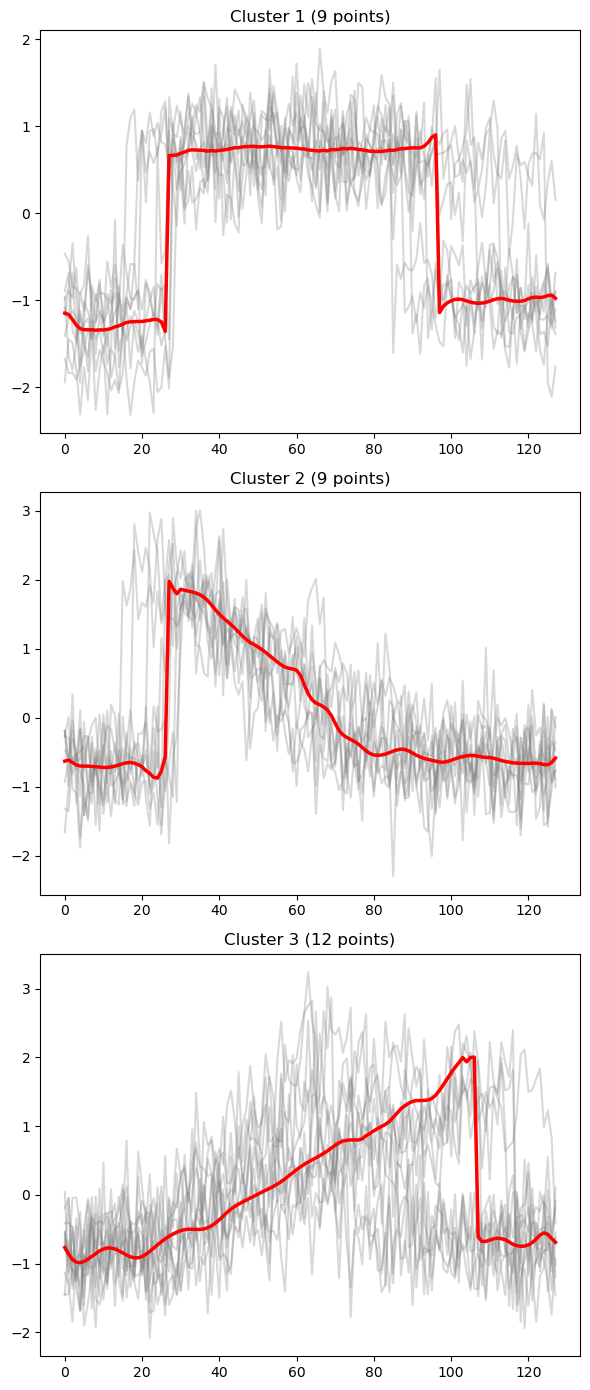

In [4]:
ds = Dataset("CBF")
X_train, y_train, X_test, y_test = ds.load_dataset()

X_list = [x for x in X_train]

K = len(np.unique(y_train))  

assignments, Z = softdtw_kmeans(
    X_list=X_list,
    K=K,
    gamma=1.0,
    max_outer=30,
    max_inner=100,
    seed=0
)

plot_softdtw_clusters(X_list, assignments, Z, K)
